# LABORATORIO TRES
Mirka Monzón   
Daniela Villamar   
Alexa Bravo  18831     
Marzo 28, 2022 

In [1]:
#importamos las librerías necesarias para trabajar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster
import sklearn.preprocessing
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')

## Task 1 K-Means

In [2]:
#Cargamos los datos.
df = pd.read_csv('minute_weather.csv')
df.head(5)

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


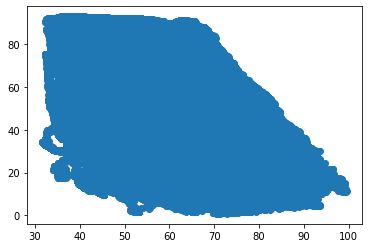

In [4]:
#Graficamos las variables que vamos a utilizar. 
plt.scatter(df['air_temp'],df['relative_humidity'])

In [12]:
#Junramos las variables a utilizar.
X = np.array(df[['air_temp', 'relative_humidity']])

In [7]:
#Creamos la función para encontrar la cantidad de clusters por medio del metodo de codo. 
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=5)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

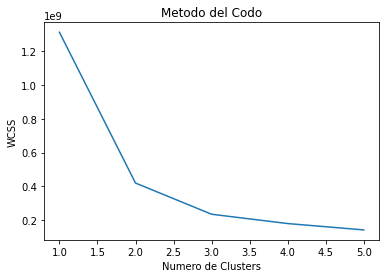

In [8]:
#Lo graficamos 
plt.plot(range(1, 6), wcss)
plt.title('Metodo del Codo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
#Definimos nuestra función de K-means con tres clusters
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[48.35633474 84.5227915 ]
 [68.28261924 22.42742665]
 [63.56005276 52.94592526]]


Text(0.5, 0, 'air_temp')

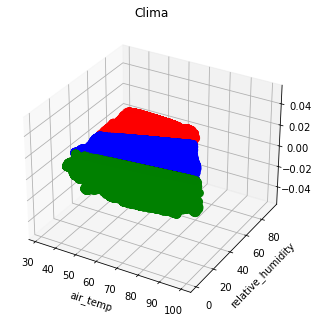

In [15]:
#Realizamos la grafica, en donde se observan los grupos. 
#https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=100)
plt.title("Clima")
plt.ylabel("relative_humidity")
plt.xlabel("air_temp")